<a href="https://colab.research.google.com/github/GinuraAdikari/InsightHive/blob/Sentiment_Analysis/ABSA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
DATA = pd.read_csv('Amazon Reviews_1_20.csv')

#***INFORMATION ABOUT DATASET***

In [4]:
DATA.head()

,default_header,review_body,label
0,1,One of the best game music soundtracks - for a...,1
1,21,Dont like it: This product smells when you ope...,0
2,41,Great Book--unacceptable condition: I was look...,0
3,61,Predictable & has a lame ending: I have read a...,0
4,81,I would sell it -- book complete with dust cov...,1


In [5]:
DATA.columns = ['No.', 'Review_Text', 'Sentiment_Label']  # ]column titles
DATA.to_csv('amazon_reviews.csv', index=False)

In [6]:
DATA = pd.read_csv('amazon_reviews.csv')

In [7]:
DATA.count()

,0
No.,683322
Review_Text,683303
Sentiment_Label,683322


In [8]:
DATA.shape

(683322, 3)

In [9]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683322 entries, 0 to 683321
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   No.              683322 non-null  int64 
 1   Review_Text      683303 non-null  object
 2   Sentiment_Label  683322 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ MB


In [10]:
DATA.describe()

,No.,Sentiment_Label
count,6.833220e+05,683322.000000
mean,6.946234e+06,0.691339
std,4.089093e+06,0.461941
min,1.000000e+00,0.000000
25%,3.416606e+06,0.000000
50%,6.833211e+06,1.000000
75%,1.058267e+07,1.000000
max,1.408438e+07,1.000000


In [11]:
DATA.head(10)

,No.,Review_Text,Sentiment_Label
0,1,One of the best game music soundtracks - for a...,1
1,21,Dont like it: This product smells when you ope...,0
2,41,Great Book--unacceptable condition: I was look...,0
3,61,Predictable & has a lame ending: I have read a...,0
4,81,I would sell it -- book complete with dust cov...,1
5,101,Sassy Baby Warming Dish. Interesting concept.:...,1
6,121,Charlie Brown Christmas was a Great Christmas ...,1
7,141,If you're tempted to throw away $30....: I bou...,0
8,161,Course Book: Well it is only for my course cal...,1
9,181,BUYER BEWARE: This is the biggest waste of mon...,0


#***DATA VISUALIZATION***

####Distribution of Sentiment Labels

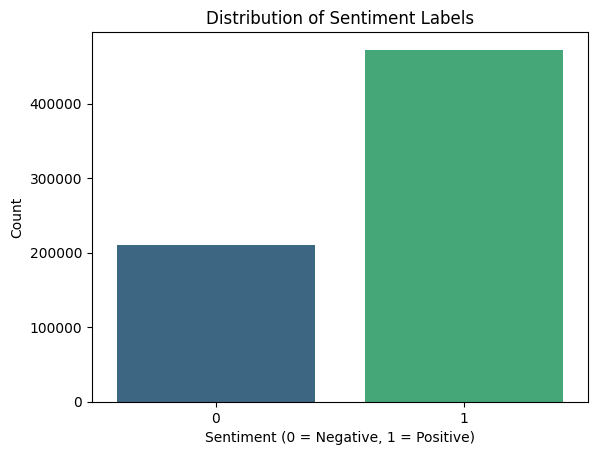

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
sns.countplot(data=DATA, x="Sentiment_Label", palette="viridis")
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()


####Word Cloud of Reviews

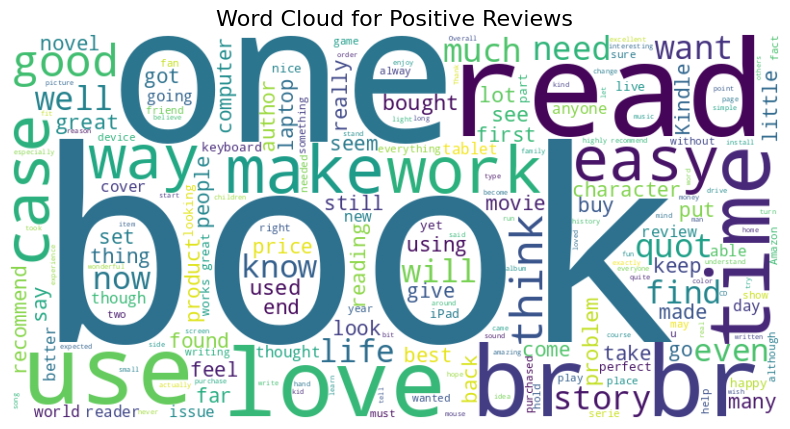

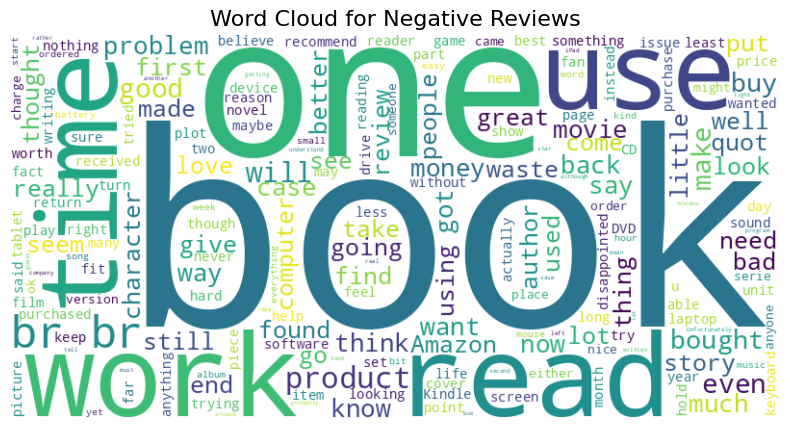

In [13]:
from wordcloud import WordCloud

# Function to create word clouds by sentiment
def generate_word_cloud(data, label, title):
    text = " ".join(data[data["Sentiment_Label"] == label]["Review_Text"].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# Word cloud for positive reviews
generate_word_cloud(DATA, label=1, title="Word Cloud for Positive Reviews")

# Word cloud for negative reviews
generate_word_cloud(DATA, label=0, title="Word Cloud for Negative Reviews")


####Review Length Distribution

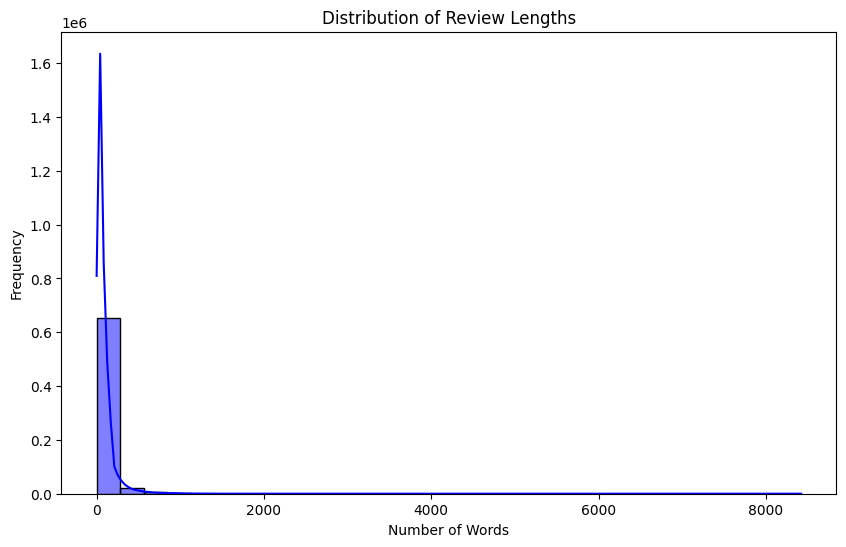

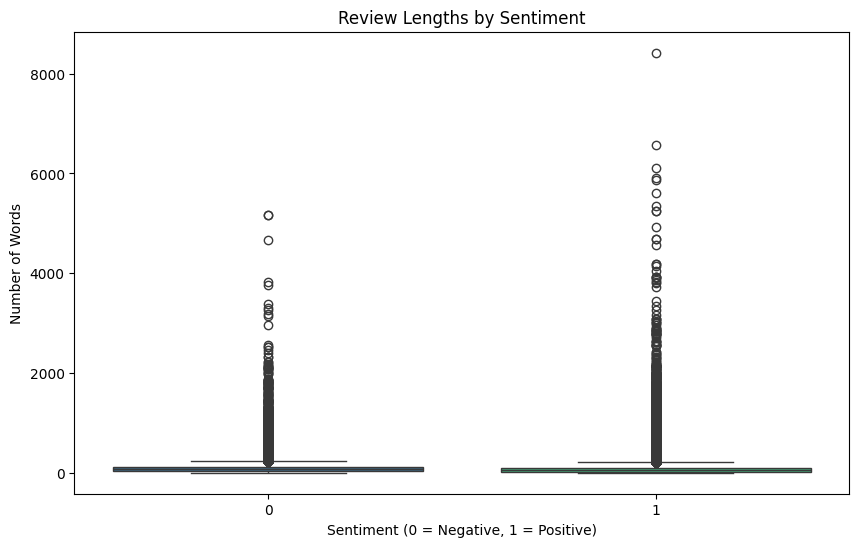

In [17]:
# Add a column for review lengths
DATA["review_length"] = DATA["Review_Text"].dropna().apply(lambda x: len(x.split()))

# Histogram of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(DATA["review_length"], bins=30, kde=True, color="blue")
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Box plot comparing review lengths by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=DATA, x="Sentiment_Label", y="review_length", palette="viridis")
plt.title("Review Lengths by Sentiment")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Number of Words")
plt.show()


####Top Words by Sentiment

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


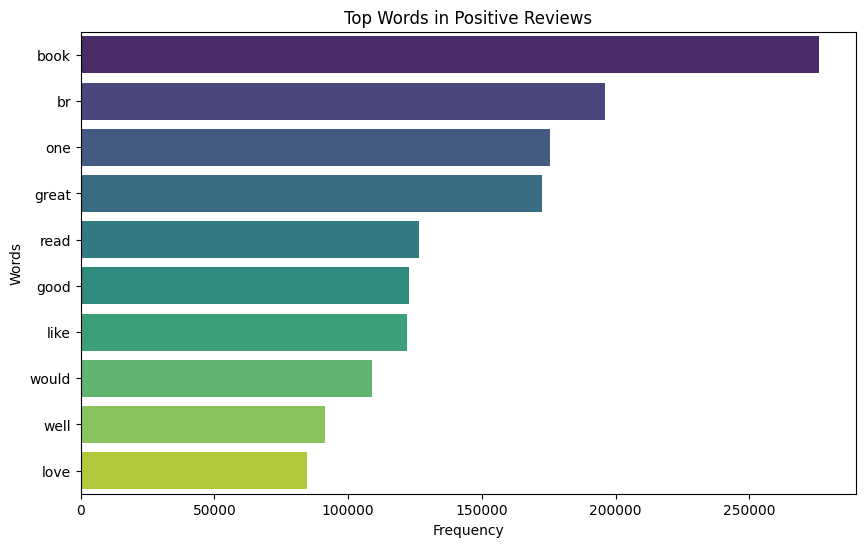

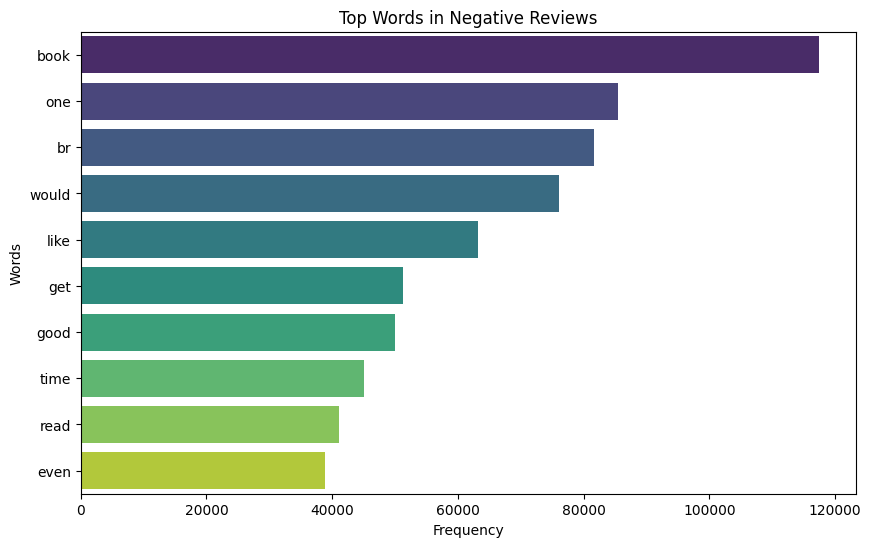

In [15]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords if not already done
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))

# Function to get top words for a sentiment
def get_top_words(data, label, n=10):
    text = " ".join(data[data["Sentiment_Label"] == label]["Review_Text"].dropna())
    words = [word.lower() for word in word_tokenize(text) if word.isalnum() and word.lower() not in stop_words]
    return Counter(words).most_common(n)

# Get top words for positive and negative reviews
top_positive = get_top_words(DATA, label=1)
top_negative = get_top_words(DATA, label=0)

# Plot top words
def plot_top_words(word_counts, title):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=words, palette="viridis")
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

plot_top_words(top_positive, "Top Words in Positive Reviews")
plot_top_words(top_negative, "Top Words in Negative Reviews")


####Common N-grams

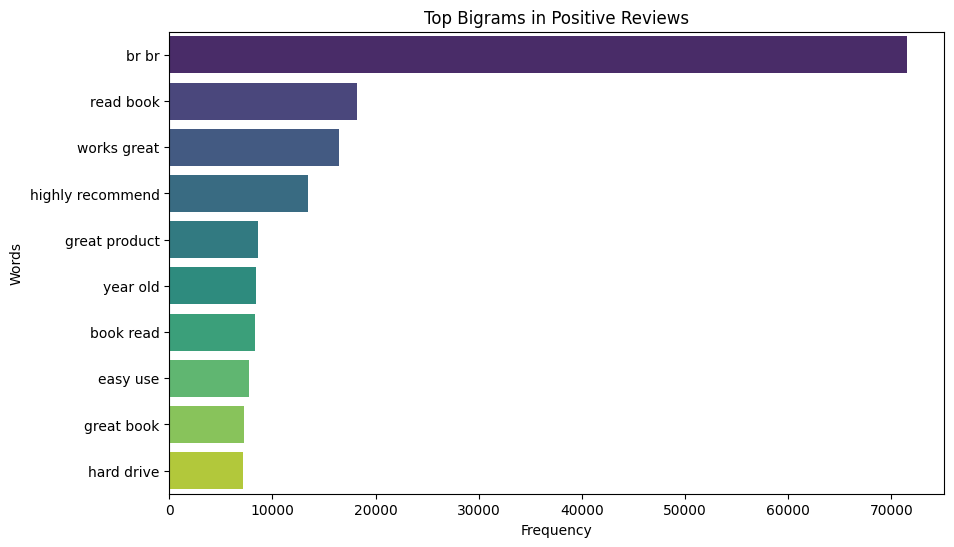

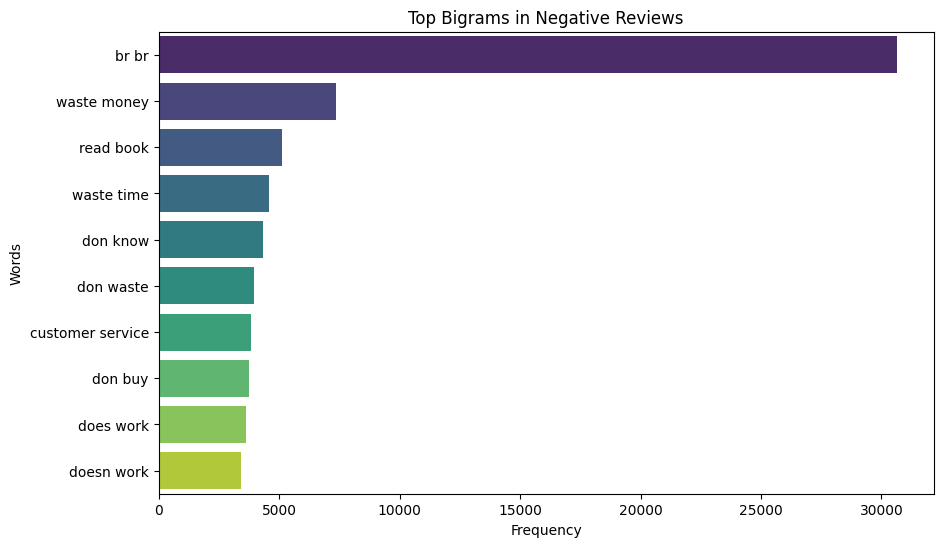

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to extract n-grams
def get_top_ngrams(data, label, ngram_range=(2, 2), n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words="english")
    text = data[data["Sentiment_Label"] == label]["Review_Text"].dropna()
    X = vectorizer.fit_transform(text)
    ngram_counts = X.sum(axis=0).A1
    ngram_features = vectorizer.get_feature_names_out()
    ngram_counts = sorted(zip(ngram_counts, ngram_features), reverse=True)[:n]
    return [(feature, count) for count, feature in ngram_counts]

# Get top bigrams for positive and negative reviews
top_positive_ngrams = get_top_ngrams(DATA, label=1)
top_negative_ngrams = get_top_ngrams(DATA, label=0)

# Plot top n-grams
plot_top_words(top_positive_ngrams, "Top Bigrams in Positive Reviews")
plot_top_words(top_negative_ngrams, "Top Bigrams in Negative Reviews")

# ***DATA PRE-PROCESSING***

###Handling missing values

In [18]:
DATA.isnull().sum()

,0
No.,0
Review_Text,19
Sentiment_Label,0
review_length,19


In [19]:
DATA['Review_Text'] = DATA.Review_Text.fillna(' ')
DATA['review_length'] = DATA.Review_Text.fillna(' ')

In [ ]:
DATA.isnull().sum()

###Handling duplicate values

In [20]:
Duplicates = DATA.duplicated().sum()
print(Duplicates)

0


###Text processing

In [21]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

####Convert text to lowercase

In [22]:
DATA['Review_Text'].head()

,Review_Text
0,One of the best game music soundtracks - for a...
1,Dont like it: This product smells when you ope...
2,Great Book--unacceptable condition: I was look...
3,Predictable & has a lame ending: I have read a...
4,I would sell it -- book complete with dust cov...


In [23]:
DATA['Review_Text'] = DATA['Review_Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [24]:
DATA['Review_Text'].head()

,Review_Text
0,one of the best game music soundtracks - for a...
1,dont like it: this product smells when you ope...
2,great book--unacceptable condition: i was look...
3,predictable & has a lame ending: i have read a...
4,i would sell it -- book complete with dust cov...


#### Remove links

In [25]:
DATA['Review_Text'] = DATA['Review_Text'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

#### Remove punctuations

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
DATA['Review_Text'].tail()

,Review_Text
683317,bought these speakers after the high recommend...
683318,"firstly, you will only appreciate this tool if..."
683319,this xd adapter adapting to compactflash is id...
683320,kingston must know what they're doing with the...
683321,i like the fact that you just put your finger ...


In [28]:
def remove_punctuation(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation, '')
  return text

DATA['Review_Text'] = DATA['Review_Text'].apply(remove_punctuation)

In [29]:
DATA['Review_Text'].head()

,Review_Text
0,one of the best game music soundtracks for a ...
1,dont like it this product smells when you open...
2,great bookunacceptable condition i was looking...
3,predictable has a lame ending i have read all...
4,i would sell it book complete with dust cover...


#### Remove special characters and numbers

In [30]:
DATA['Review_Text'].tail(5)

,Review_Text
683317,bought these speakers after the high recommend...
683318,firstly you will only appreciate this tool if ...
683319,this xd adapter adapting to compactflash is id...
683320,kingston must know what theyre doing with the ...
683321,i like the fact that you just put your finger ...


In [31]:
DATA['Review_Text'] = DATA['Review_Text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

In [32]:
DATA['Review_Text'].tail()

,Review_Text
683317,bought these speakers after the high recommend...
683318,firstly you will only appreciate this tool if ...
683319,this xd adapter adapting to compactflash is id...
683320,kingston must know what theyre doing with the ...
683321,i like the fact that you just put your finger ...


#### Remove Stopwords

In [33]:
DATA['Review_Text'].tail()

,Review_Text
683317,bought these speakers after the high recommend...
683318,firstly you will only appreciate this tool if ...
683319,this xd adapter adapting to compactflash is id...
683320,kingston must know what theyre doing with the ...
683321,i like the fact that you just put your finger ...


In [ ]:
stop_words = stopwords.words('english')
DATA['Review_Text'] = DATA['Review_Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [ ]:
DATA['Review_Text'].tail()

#### Stemming

In [ ]:
DATA['Review_Text'].head(20)

In [ ]:
ps = PorterStemmer()
DATA['Review_Text'] = DATA['Review_Text'].apply(lambda x: " ".join(ps.stem(word) for word in x.split()))

In [ ]:
DATA['Review_Text'].head(20)

#### Tokenization

In [ ]:
DATA['tokens'] = DATA['Review_Text'].apply(nltk.word_tokenize)

In [ ]:
#stop_words = set(stopwords.words('english'))
DATA['tokens'] = DATA['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

#### Lemmatization

In [ ]:
DATA['Review_Text'].head(10)

In [ ]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
DATA['tokens'] = DATA['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
DATA['Review_Text'].head(10)

#### Finalize

In [ ]:
# Filter short reviews (length < 3 words)
DATA['review_length'] = DATA['tokens'].apply(len)
DATA = DATA[DATA['review_length'] >= 3]

# Feature engineering: Join tokens back into sentences
DATA['cleaned_review'] = DATA['tokens'].apply(lambda x: ' '.join(x))

In [ ]:
DATA.head()

### DataSet

In [ ]:
DATA.head()

In [ ]:
DATA.count()

#### X & Y

In [ ]:
# Separate features (X) and target (Y)
target_column = 'Sentiment_Label'  # Replace 'label' with the actual name of your target column
Y = DATA[target_column]
X = DATA[['cleaned_review']]

# Print the shapes of X and Y
print("Features shape: ", X.shape)
print("Target shape: ", Y.shape)

# Check for missing values in the target column
if Y.isnull().sum() > 0:
    print(f"Missing values in target: {Y.isnull().sum()}")

# Check for missing values in the features
null_counts = X.isnull().sum()
if null_counts.any():  # Check if any column has missing values
    print(f"Missing values in features:\n{null_counts[null_counts > 0]}")
else:
    print("No missing values in features.")


#### Train & Test

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the resulting datasets
print("Training features shape: ", X_train.shape)
print("Testing features shape: ", X_test.shape)
print("Training target shape: ", Y_train.shape)
print("Testing target shape: ", Y_test.shape)

# Check if the class distribution is preserved after the split
print("\nClass distribution in training set:")
print(Y_train.value_counts(normalize=True))

print("\nClass distribution in testing set:")
print(Y_test.value_counts(normalize=True))

#### Handle class Imbalance

In [ ]:
import matplotlib.pyplot as plt

# Visualize class distribution in training and testing sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Training set
Y_train.value_counts(normalize=True).plot(kind='bar', ax=axes[0], color=['blue', 'orange'])
axes[0].set_title("Class Distribution in Training Set")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Proportion")

# Testing set
Y_test.value_counts(normalize=True).plot(kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_title("Class Distribution in Testing Set")
axes[1].set_xlabel("Class")

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Check class imbalance in the original training set
class_distribution_train = Y_train.value_counts(normalize=True)
print("Class distribution in training set (before SMOTE):")
print(class_distribution_train)

# Visualize class imbalance
plt.figure(figsize=(8, 5))
class_distribution_train.plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Distribution in Training Set (Before SMOTE)")
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Applying SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)  # Use max_features to limit vocabulary size
X_train_vec = vectorizer.fit_transform(X_train['cleaned_review'])

# Apply SMOTE
smote = SMOTE(random_state=42)
X_Train, Y_Train = smote.fit_resample(X_train_vec, Y_train)

In [ ]:
# Check class distribution after resampling
class_distribution_resampled = Y_Train.value_counts(normalize=True)
print("\nClass distribution in training set (after SMOTE):")
print(class_distribution_resampled)

# Visualize class distribution after SMOTE
plt.figure(figsize=(8, 5))
class_distribution_resampled.plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Distribution in Training Set (After SMOTE)")
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

In [ ]:
print("First 5 samples in X_train:")
print(X_Train[:5])
print("First 5 labels in Y_train:")
print(Y_Train.head())

#### Build Vocabulary

In [ ]:
X_Train_r = vectorizer.inverse_transform(X_Train)
X_Train_r = [" ".join(tokens) for tokens in X_Train_r]

In [ ]:
def build_vocab(sentences, max_vocab_size=5000):
    word_count = {}
    for sentence in sentences:
        for word in sentence.split():
            word_count[word] = word_count.get(word, 0) + 1

    sorted_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True) [:max_vocab_size]

    return {word: idx+1 for idx, (word, _) in enumerate(sorted_words)}

vocab = build_vocab(X_Train_r)
print("Vocabulary size:", len(vocab))
print(vocab)
X_train.head()

#### Custom Dataset Class

In [ ]:
import torch
from torch.utils.data import Dataset

class SentimentDataset(Dataset):
    def __init__(self, reviews, targets, vocab, max_len=100):
        self.reviews = reviews
        self.targets = targets
        self.vocab = vocab
        self.max_len = max_len

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, item):
        review = self.reviews[item].split()[:self.max_len]
        review_ids = [self.vocab.get(word, 0) for word in review]
        review_ids = review_ids + [0] * (self.max_len - len(review_ids))
        target = self.targets[item]

        return torch.tensor(review_ids, dtype=torch.long), torch.tensor(target, dtype=torch.long)

Train_Dataset = SentimentDataset(X_Train_r, Y_Train.to_list(), vocab)
Test_Dataset = SentimentDataset(X_test['cleaned_review'].to_list(), Y_test.to_list(), vocab)

#  ***Model***

### Model Architecture

In [ ]:
import torch.nn as nn

class SentimentModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(SentimentModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.attention = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        attention_weights = torch.tanh(self.attention(lstm_out))
        attention_weights = torch.softmax(attention_weights, dim=1)
        context = (attention_weights * lstm_out).sum(dim=1)
        output = self.fc(context)
        return output

### Train

In [ ]:
from torch.utils.data import DataLoader
import torch.optim as optim

# DataLoaders
train_loader = DataLoader(Train_Dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(Test_Dataset, batch_size=16)

# Initialize model, optimizer, and loss function
vocab_size = len(vocab) + 1  # Include padding index
embed_dim = 50
hidden_dim = 128
output_dim = len(Y.unique())

model = SentimentModel(vocab_size, embed_dim, hidden_dim, output_dim)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
for epoch in range(5):
    model.train()
    total_loss = 0
    for batch in train_loader:
        texts, labels = [b.to(device) for b in batch]
        optimizer.zero_grad()
        outputs = model(texts)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")

### Evaluate

In [ ]:
from sklearn.metrics import classification_report

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        texts, labels = [b.to(device) for b in batch]
        outputs = model(texts)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(classification_report(all_labels, all_preds, target_names=['Negative', 'Positive']))

#,

####>

In [ ]:
# Make sure the SMOTE code is executed before the following line:

train_dataset_resampled = TensorDataset(torch.tensor(X_train_resampled.toarray(), dtype=torch.float32), torch.tensor(Y_train_resampled.to_numpy(), dtype=torch.long))

NameError: name 'TensorDataset' is not defined

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to your training data
X_train_vec = vectorizer.fit_transform(X_train['cleaned_review'])

# Transform your testing data using the fitted vectorizer
X_test_vec = vectorizer.transform(X_test['cleaned_review'])

# Print original class distribution
print("Original class distribution:", Y_train.value_counts())

# Apply SMOTE to the vectorized training data
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_vec, Y_train)

# Check distribution after applying SMOTE
print("Resampled class distribution:", Y_train_resampled.value_counts())



from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer with reduced features
vectorizer = TfidfVectorizer(max_features=1000)  # Try a smaller value

# Fit and transform
X_train_vec = vectorizer.fit_transform(X_train['cleaned_review'])
X_test_vec = vectorizer.transform(X_test['cleaned_review'])

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_vec, Y_train)

# Check distribution after applying SMOTE
print("Resampled class distribution:", Y_train_resampled.value_counts())

#>

# ***BERT***

In [ ]:
# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
from collections import Counter
volab = Counter()

In [ ]:
# Set the model name
MODEL_NAME = 'bert-base-cased'

# Build a BERT based tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Store length of each review
token_lens = []

# Iterate through the 'Review_Text' column instead of 'content'
for txt in data['Review_Text']:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Text(0.5, 0, 'Token count')

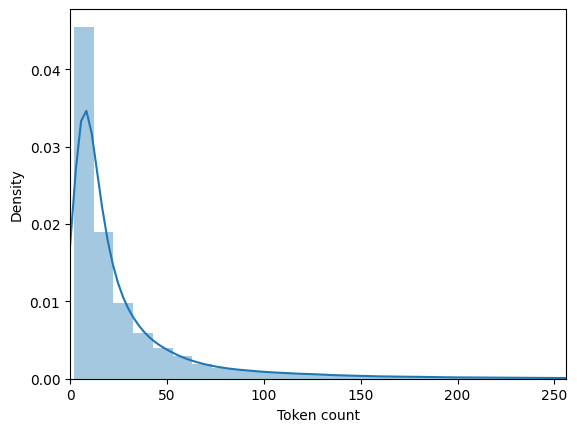

In [ ]:
# plot the distribution of review lengths
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count')

In [ ]:
class GPReviewDataset(Dataset):
    # Constructor Function
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    # Length magic method
    def __len__(self):
        return len(self.reviews)

    # get item magic method
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]

        # Encoded format to be returned
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
import random

# Assuming RANDOM_SEED is intended to be used, it should be defined:
RANDOM_SEED = 42  # Or any desired integer
# you can change this random seed value to get different result each time the model train


data_train, data_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
data_val, data_test = train_test_split(data_test, test_size=0.5, random_state=RANDOM_SEED)

print(data_train.shape, data_val.shape, data_test.shape)

(94622, 3) (11828, 3) (11828, 3)


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

tokens = word_tokenize(data['Review_Text'].str.cat(sep=' '))
stop_words = set(stopwords.words('english'))
filtered_tokens = [w for w in tokens if w not in stop_words]
print(filtered_tokens)

NameError: name 'data' is not defined

## Text Normalization

#### Spelling check

In [ ]:
data = pd.read_csv('AR.csv')

In [ ]:
data['Review_Text'].tail()

NameError: name 'data' is not defined

In [ ]:
from textblob import TextBlob
import contractions

def normalize_text(text):
    text = contractions.fix(text)
    text = TextBlob(text).correct().string
    return text

data['Review_Text'] = data['Review_Text'].apply(normalize_text)

#SBERT

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sentiment_Label'] = le.fit_transform(data['Sentiment_Label'])
print(data['Sentiment_Label'])

# ***Aspect term extraction***

In [ ]:
from transformers import BertModel, BertTokenizer
from transformers import get_scheduler
import torch
from torch.utils.data import Dataset
from torch.utils.data import Dataset, DataLoader
import time
import os
from tqdm import tqdm

In [ ]:
class ABTEDataset(Dataset):
    def __init__(self, df, tokenizer):
        self.df = df
        self.tokenizer = tokenizer

    def __getitem__(self, index):
        tokens = self.df.iloc[index]['tokens']
        tags = self.df.iloc[index]['tags']
        pols = self.df.iloc[index]['pols']

        tokens = tokens.replace("'", "").strip("][").split(', ')
        tags = tags.strip('][').split(', ')
        pols = pols.strip('][').split(', ')


    def __len__(self):
        return len(self.df)

#Model

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import AdamW
from sklearn.metrics import classification_report

In [ ]:
# 4. Tokenization for BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize and encode training and testing data
train_encodings = tokenizer(list(X_train['cleaned_review']), truncation=True, padding=True, max_length=128, return_tensors="pt")
test_encodings = tokenizer(list(X_test['cleaned_review']), truncation=True, padding=True, max_length=128, return_tensors="pt")

train_labels = torch.tensor(Y_Train.values)  # Resampled target labels
test_labels = torch.tensor(Y_test.values)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

NameError: name 'X_train' is not defined

In [ ]:
# 5. Load BERT model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)  # Binary classification

# 6. Prepare DataLoader
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# 7. Define optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# 8. Training Loop
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

for epoch in range(3):  # Train for 3 epochs
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")

# 9. Evaluation
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=-1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 10. Classification Report
print(classification_report(all_labels, all_preds, target_names=['Class 0', 'Class 1']))

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Create TensorDataset for resampled data
train_dataset_resampled = TensorDataset(torch.tensor(X_train_resampled.toarray(), dtype=torch.float32), torch.tensor(Y_train_resampled.to_numpy(), dtype=torch.long))

# Create DataLoaders
train_loader_resampled = DataLoader(train_dataset_resampled, batch_size=16, shuffle=True)  # Adjust batch size as needed
test_loader = DataLoader(test_dataset, batch_size=16)  # Use the original test_dataset

NameError: name 'X_train_resampled' is not defined

#### Train

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import AdamW

# Prepare DataLoader
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(train_labels))
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(test_labels))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Training loop
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

for epoch in range(3):  # Train for 3 epochs
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")

NameError: name 'train_encodings' is not defined

#### Evaluate

In [ ]:
from sklearn.metrics import classification_report

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=-1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

# >>

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import AdamW
from sklearn.metrics import classification_report

# 1. Tokenization for BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

#Decode TF-IDF matrix back to text for tokenization
X_train_texts = vectorizer.inverse_transform(X_Train)
X_train_texts = [" ".join(tokens) for tokens in X_train_texts]

# Tokenize and encode training and testing data
train_encodings = tokenizer(
    list(X_train_texts),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="pt"
)
test_encodings = tokenizer(
    list(X_test['cleaned_review']),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="pt"
)

train_labels = torch.tensor(Y_Train, dtype=torch.long)  # Target labels
test_labels = torch.tensor(Y_test.values, dtype=torch.long)

# 2. Load BERT model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# 3. Prepare DataLoaders
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# 4. Define optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# 5. Training Loop
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

for epoch in range(3):  # Train for 3 epochs
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")

# 6. Evaluation
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=-1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 7. Classification Report
print(classification_report(all_labels, all_preds, target_names=['Class 0', 'Class 1']))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyboardInterrupt: 